In [15]:
%matplotlib inline
import os
import pandas as pd

In [11]:
filename = 'UPI_RTGS_NEFT/UPI.xlsx'

In [12]:
df = pd.read_excel(filename,sheet_name="UPI")
df.columns = ['date','vol','val']
df.date = pd.to_datetime(df.date)
df.date = df.date.dt.to_period(freq='D')
df = df.set_index('date')

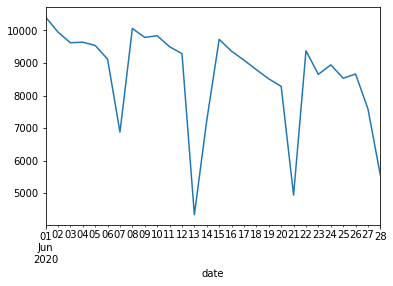

In [19]:
df.val.plot.line()

In [20]:
from datetime import datetime, date, timedelta
import matplotlib as mpl
import dateutil
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams
import seaborn as sns
import locale
import pandas as pd
import requests
from pandas import ExcelWriter
import numpy as np

In [21]:
sns.set(style='ticks')
# pal = sns.color_palette([
#     [31 / 255, 73 / 255, 125 / 255], #JPMBlue
#     [247 / 255, 150 / 255, 70 / 255], #JPMOrange
#     [155 / 255, 187 / 255, 89 / 255] #JPMGreen
# ])

pal = sns.color_palette([
    [222 / 255, 110 / 255, 116 / 255], #JPMBlue
    [101 / 255, 134 / 255, 194 / 255], #JPMOrange
    [43 / 255, 175 / 255, 100 / 255] #JPMGreen
])

linestyles = [
    {'c': pal[0], 'linestyle': '-'}, 
    {'c': pal[1], 'linestyle': '-'}, 
    {'c': pal[0], 'linestyle': 'dashed'}, 
    {'c': pal[1], 'linestyle': 'dashed'}, 
    {'c': pal[0], 'linestyle': ':'}, 
    {'c': pal[1], 'linestyle': ':'}, 
    {'c': pal[2], 'linestyle': '-'}, 
    {'c': pal[2], 'linestyle': 'dashed'}, 
    {'c': pal[2], 'linestyle': ':'}, 
    
]

barstyles = [
    {'color': pal[0], },
    {'color': pal[0], },
    {'edgecolor': pal[0], 'color': 'white', 'linewidth': 1, 'hatch': '////'},
    {'edgecolor': pal[1], 'color': 'white', 'linewidth': 1, 'hatch': '////'},
    {'edgecolor': pal[0], 'color': 'white', 'linewidth': 1, 'hatch': '....'},
    {'edgecolor': pal[1], 'color': 'white', 'linewidth': 1, 'hatch': '....'},
    
]

rcParams = {
    'font.family' : 'sans-serif',
    'font.sans-serif' : 'Arial',
    'font.weight' : 'bold',
    'font.stretch' : 'condensed',
    'figure.autolayout' : False,
    'hatch.linewidth' : 0.2
}

csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
# Plantagenet Cherokee

# CHARTDIR
SAVEFIG_KWARGS = {'dpi': 72*4}
LEGEND_KWARGS = {'frameon': True, 'framealpha': 0.9, 'labelspacing': 0.4}
CHART_GAP = timedelta(days=20)
CHART_TITLE_ALIGN = 'left'

# yearsFmt = mdates.DateFormatter('%b-%Y')
# yearsFmt = mdates.DateFormatter('%b-%d')
# yearsFmt = mdates.DateFormatter('%Y')
fontsize = 15
fontweight = 'regular'
title_fontsize = 15
title_fontweight = 'regular'
tick_label_size = 15
tick_label_weight = 'regular'
legend_title_fontsize = 15
legend_title_fontweight = 'regular'
legend_label_fontsize = 15
legend_label_fontweight = 'regular'

annotation_fontsize = 15
annotation_fontweight = 'regular'
xticks_params = {
    'pad' : 1,
    'length' : 3,
}
yticks_params = {
    'pad' : 2,
    'length' : 2,
}

savefig_params = {
    'bbox_inches' : 'tight',
    'pad_inches' : 0.4,
}
xlabel_params = {
    'position' : (0.5,0.5),
    'fontsize' : 15,
    'fontweight' : 'regular',
    'labelpad': None,
}
ylabel_params = {
    'fontsize' : 15,
    'fontweight' : 'regular',
}


footnote_fontsize = 15
footnote_fontweight = 'regular'
fontname = "Baskerville"
def apply_to_axes(axes, footnote_text = 'AllStuffData'):
    _axes = (axes,) if not isinstance(axes, tuple) else axes
    for ax in axes:
        ax.xaxis.label.set_fontsize(xlabel_params['fontsize'])
        ax.yaxis.label.set_fontsize(ylabel_params['fontsize'])
        for item in [ax.xaxis.label, ax.yaxis.label]:
            item.set_fontweight(fontweight)
            item.set_fontname(fontname)
        
        ax.title.set_fontsize(title_fontsize)
        ax.title.set_fontweight(title_fontweight)
        ax.title.set_fontname(fontname)
        
        for item in ax.get_xticklabels() + ax.get_yticklabels():
            item.set_fontsize(tick_label_size)
            item.set_fontweight(tick_label_weight)
            item.set_fontname(fontname)
            
        if ax.get_legend() is not None:
            lt = ax.get_legend().get_title()
            lt.set_fontsize(legend_title_fontsize)
            lt.set_fontweight(legend_title_fontweight)
            lt.set_fontname(fontname)
            t0 = ax.get_legend().get_texts()[0]
            t0.set_fontsize(legend_label_fontsize)
            t0.set_fontweight(legend_label_fontweight)
            t0.set_fontname(fontname)
        
        footnote = ax.annotate(footnote_text, **footnote_params)
        footnote.set_fontsize(footnote_fontsize)
        footnote.set_fontname(fontname)
        footnote.set_fontweight(footnote_fontweight)
        
    return axes

In [86]:
x_min = datetime(2020,6,1)
x_max = date.today() + timedelta(1)
tickrule = dateutil.rrule.rrule(
    freq = dateutil.rrule.DAILY,
    interval = 2,
    dtstart = x_min,
    until = x_max,
)
yearsFmt = mdates.DateFormatter('%b-%d')
footnote_params = {
    'xy': (0,-0.10),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.06),
    'ncol': 3,
}

grid_kwargs = {
    'linestyle': '-',
    'linewidth': 0.5,
#     'color': 3,
}


SAVEFIG_KWARGS = {'dpi': 72*4}

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['lines.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR

In [ ]:
glob

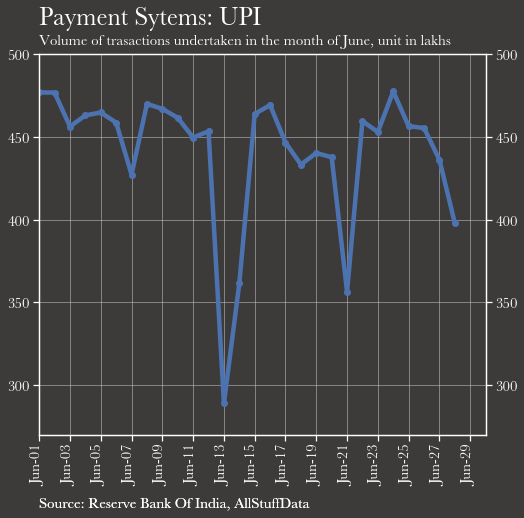

In [89]:
df1 = df.copy()
df1 = df1[['vol']]

fig, ax = plt.subplots(figsize=(8,7))
for i, item in enumerate(list(df1.columns)):
    df_ = df1[[item]]
    mask = df_[item].notnull()
    ax.plot(df_.index[mask].start_time.values, df_[item][mask], label = item, linewidth=4.5, zorder = 2, marker='o')
    
mpl.rcParams['savefig.facecolor'] = (61.0/255, 58.5/255, 57.0/255)
ax.set_facecolor((61.0/255, 58.5/255, 57.0/255))
fig.patch.set_facecolor((61.0/255, 58.5/255, 57.0/255))


ax.axhline(linewidth=0.5 , color='black', zorder=1)
ax.set_xticks([_ for _ in tickrule])
ax.set_ylim(270,500)

ax.grid(b=None, which='major', axis='both',**grid_kwargs)



ax.set_xlim([mdates.date2num(x_min),mdates.date2num(x_max)])
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
ax.set_title('Payment Sytems: UPI', loc=CHART_TITLE_ALIGN, fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
# ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"Volume of trasactions undertaken in the month of June, unit in lakhs",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
footnote_text = "Source: Reserve Bank Of India, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
ax.set_xticklabels(ax.get_xticks(),rotation = 'vertical')
ax.xaxis.set_major_formatter(yearsFmt)
f = os.path.dirname(os.getcwd())+'/todays_chart/upi_1.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

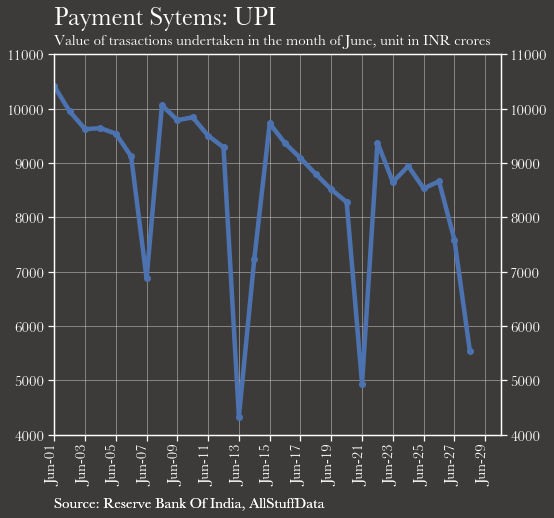

In [90]:
df1 = df.copy()
df1 = df1[['val']]

fig, ax = plt.subplots(figsize=(8,7))
for i, item in enumerate(list(df1.columns)):
    df_ = df1[[item]]
    mask = df_[item].notnull()
    ax.plot(df_.index[mask].start_time.values, df_[item][mask], label = item, linewidth=4.5, zorder = 2, marker='o')
    
mpl.rcParams['savefig.facecolor'] = (61.0/255, 58.5/255, 57.0/255)
ax.set_facecolor((61.0/255, 58.5/255, 57.0/255))
fig.patch.set_facecolor((61.0/255, 58.5/255, 57.0/255))


ax.axhline(linewidth=0.5 , color='black', zorder=1)
ax.set_xticks([_ for _ in tickrule])
ax.set_ylim(4000,11000)

ax.grid(b=None, which='major', axis='both',**grid_kwargs)



ax.set_xlim([mdates.date2num(x_min),mdates.date2num(x_max)])
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
ax.set_title('Payment Sytems: UPI', loc=CHART_TITLE_ALIGN, fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
# ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"Value of trasactions undertaken in the month of June, unit in INR crores",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
footnote_text = "Source: Reserve Bank Of India, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
ax.set_xticklabels(ax.get_xticks(),rotation = 'vertical')
ax.xaxis.set_major_formatter(yearsFmt)
f = os.path.dirname(os.getcwd())+'/todays_chart/upi_2.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)